In [130]:
#default_exp data

# Data Processing

<br>

### Imports

In [95]:
#exports
import numpy as np
import pandas as pd

import os

<br>

### Real Power

In [126]:
real_power_data_dir = '../data/real_power'

sites = ['Geevor_CB52', 'Mousehole_CB51', 'Staplegrove_CB905']

In [77]:
os.listdir(real_power_data_dir)

['MW_Geevor_CB52_MW_minute_real_power_MW.csv',
 'MW_Geevor_CB52_MW_observation_variable_half_hourly_real_power_MW.csv',
 'MW_Geevor_CB52_MW_target_variable_half_hourly_max_min_real_power_MW.csv',
 'MW_Mousehole_CB51_MW_minute_real_power_MW.csv',
 'MW_Mousehole_CB51_MW_observation_variable_half_hourly_real_power_MW.csv',
 'MW_Mousehole_CB51_MW_target_variable_half_hourly_max_min_real_power_MW.csv',
 'MW_Staplegrove_CB905_MW_minute_real_power_MW_pre_august.csv',
 'MW_Staplegrove_CB905_MW_observation_variable_half_hourly_real_power_MW_august.csv',
 'MW_Staplegrove_CB905_MW_observation_variable_half_hourly_real_power_MW_pre_august.csv',
 'MW_Staplegrove_CB905_MW_observation_variable_half_hourly_real_power_MW_september.csv',
 'MW_Staplegrove_CB905_MW_target_variable_half_hourly_max_min_real_power_MW_pre_august.csv']

In [108]:
#exports
def clean_real_power_df(
    df: pd.DataFrame,
    cols_to_keep: list=['maxvalue', 'minvalue', 'value_max', 'value_min', 'quality', 'samplecount', 'value']
):
    if 'attrId' in df.columns:
        assert df['attrId'].reset_index().duplicated().sum() == 0, 'The time and attrId data must contain no duplicate rows'
        assert df['attrId'].value_counts().size == 1, 'Only one `attrId` value should be contained in the dataset'
    
    if 'units' in df.columns:
        assert df['units'].value_counts().size == 1, 'Only one `units` value should be contained in the dataset'

    df_clean = df[sorted(list(set(cols_to_keep).intersection(set(df.columns))))].copy()
    
    return df_clean

def load_real_power_dataset(
    data_dir: str,
    site: str='Geevor_CB52',
    real_power_variable: str='minute',
    time_period: str=''
):
    valid_time_periods = ['', '_august', '_pre_august', '_september']
    valid_real_power_variables = ['minute', 'observation_variable_half_hourly', 'target_variable_half_hourly_max_min']
    assert real_power_variable in valid_real_power_variables, f'`real_power_variable` must be one of {", ".join(valid_real_power_variables)}'
    assert time_period in valid_time_periods, f'`time_period` must be one of {", ".join(valid_time_periods)}'
    
    fp = f'{data_dir}/MW_{site}_MW_{real_power_variable}_real_power_MW{time_period}.csv'

    df = pd.read_csv(fp)
    
    if 'Unnamed: 0' in df.columns:
        df = df.drop(columns=['Unnamed: 0'])

    df['time'] = pd.to_datetime(df['time'], utc=True)
    df = df.set_index('time')
    
    df = clean_real_power_df(df)
    
    return df

In [106]:
%%time

df_staplegrove_minute = load_real_power_dataset(real_power_data_dir, site='Staplegrove_CB905', real_power_variable='minute', time_period='_pre_august')
df_mousehole_minute = load_real_power_dataset(real_power_data_dir, site='Mousehole_CB51', real_power_variable='minute')
df_geevor_minute = load_real_power_dataset(real_power_data_dir, site='Geevor_CB52', real_power_variable='minute')

df_staplegrove_minute.head()

Wall time: 11.5 s


,maxvalue,minvalue,quality,samplecount,value
time,,,,,
2019-11-01 00:00:00+00:00,1.080326,1.004972,Good,5,1.060368
2019-11-01 00:01:00+00:00,1.080326,1.046835,Good,11,1.060862
2019-11-01 00:02:00+00:00,1.071953,1.055208,Good,8,1.060566
2019-11-01 00:03:00+00:00,1.088698,1.066930,Good,7,1.081386
2019-11-01 00:04:00+00:00,1.088698,1.063580,Good,7,1.077898


<AxesSubplot:xlabel='time'>

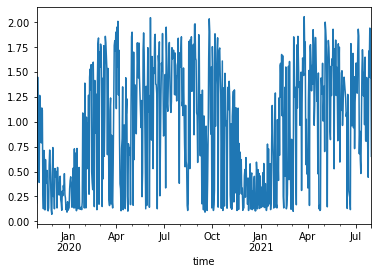

In [123]:
(df_staplegrove_minute['maxvalue'] - df_staplegrove_minute['minvalue']).resample('d').max().plot()

<AxesSubplot:xlabel='time'>

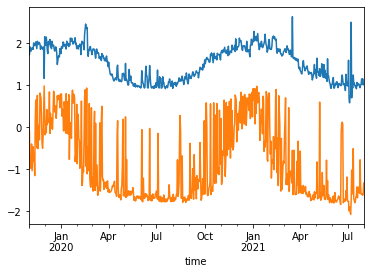

In [94]:
df_staplegrove_minute['maxvalue'].resample('d').max().plot()
df_staplegrove_minute['minvalue'].resample('d').min().plot()

In [127]:
df_staplegrove_observation = load_real_power_dataset(real_power_data_dir, site='Staplegrove_CB905', real_power_variable='observation_variable_half_hourly', time_period='_pre_august')

df_staplegrove_observation.head()

,value
time,
2019-11-01 00:00:00+00:00,1.101302
2019-11-01 00:30:00+00:00,1.084653
2019-11-01 01:00:00+00:00,0.998729
2019-11-01 01:30:00+00:00,0.914548
2019-11-01 02:00:00+00:00,0.875550


In [111]:
df_staplegrove_target = load_real_power_dataset(real_power_data_dir, site='Staplegrove_CB905', real_power_variable='target_variable_half_hourly_max_min', time_period='_pre_august')

df_staplegrove_target.head()

,value_max,value_min
time,,
2019-11-01 00:00:00+00:00,1.145350,1.060368
2019-11-01 00:30:00+00:00,1.139437,1.027391
2019-11-01 01:00:00+00:00,1.047172,0.952354
2019-11-01 01:30:00+00:00,0.958730,0.880103
2019-11-01 02:00:00+00:00,0.905183,0.836223


<br>

### Weather

In [114]:
weather_data_dir = '../data/weather'

In [115]:
os.listdir(weather_data_dir)

['.ipynb_checkpoints',
 'df_mousehole_1_hourly.csv',
 'df_mousehole_2_hourly.csv',
 'df_mousehole_3_hourly.csv',
 'df_mousehole_4_hourly.csv',
 'df_mousehole_5_hourly.csv',
 'df_staplegrove_1_hourly.csv',
 'df_staplegrove_2_hourly.csv',
 'df_staplegrove_3_hourly.csv',
 'df_staplegrove_4_hourly.csv',
 'df_staplegrove_5_hourly.csv']

In [119]:
#exports
def load_weather_df(
    data_dir: str,
    grid_point: str='mousehole_1'
):
    df = pd.read_csv(f'{data_dir}/df_{grid_point}_hourly.csv')

    df['datetime'] = pd.to_datetime(df['datetime'], utc=True)
    df = df.set_index('datetime')
    
    return df

In [121]:
df_weather_mh1 = load_weather_df(weather_data_dir)

df_weather_mh1.head()

,temperature,solar_irradiance,windspeed_north,windspeed_east,pressure,spec_humidity
datetime,,,,,,
2019-01-01 00:00:00+00:00,10.764093,0.0,-1.031864,1.723119,103612.060,0.006268
2019-01-01 01:00:00+00:00,10.746118,0.0,-1.098079,1.715133,103617.540,0.006247
2019-01-01 02:00:00+00:00,10.716302,0.0,-1.238148,1.707918,103641.120,0.006227
2019-01-01 03:00:00+00:00,10.688959,0.0,-1.530157,1.625398,103638.695,0.006261
2019-01-01 04:00:00+00:00,10.768945,0.0,-1.977102,1.431831,103635.140,0.006347


In [ ]:
# should create a reindex func that will let you ffill or interpolate

# interpolate weather data
# get common idxs 
# combine datasets

In [129]:
#hide
from nbdev.export import notebook2script
    
notebook2script()

Converted 01-data-processing.ipynb.
Converted 02-spatial-analysis.ipynb.
Converted 03-eda.ipynb.
Converted 04-model-suite.ipynb.
